# LIMPIEZA DEL DATAFRAME DE VUELOS

## En este Notebook se va a realizar la limpieza de los registros de vuelos obtenidos anteriormente. El resultado final de la limpieza es un DataFrame con las siguientes columnas:

- **flight_id**: Columna con un id único para cada vuelo, para poder relacionarlo posteriormente con el resto de datos.
- **Departure_date_time**: Columna en formato *Datetime* con la fecha y la hora prevista para la salida del vuelo.
- **cod_flight_IATA**: Código IATA del vuelo.
- **cod_flight_ICAO**: Código ICAO del vuelo.
- **day**: Columna en formato *Datetime* con el día del vuelo.
- **week_day**: Columna con el día de la semana.
- **status**: Columna con el estado del vuelo(Landed, Cancelled, Derived..).
- **airliner**: Nombre del operador del vuelo.
- **cod_airliner_IATA**: Código IATA de la compañia.
- **cod_airliner_ICAO**: Código ICAO de la compañia.
- **Scheduled_dep**: Horario programado para la salida del vuelo.
- **depart_time**: Hora real de la salida del vuelo.
- **dep_situation**: Estado de la salida del vuelo(late, early, on time..).
- **dep_mins_of_delay**: Minutos de retraso o de adelanto en la salida del vuelo.
- **city**: Ciudad del aeropuerto de destino.
- **cod_airport_IATA**: Código IATA del aeropuerto de destino.
- **cod_airport_ICAO**: Código ICAO del aeropuerto de destino.
- **arrival**: Hora local de la llegada del vuelo.
- **arr_situation**: Estado de la llegada del vuelo(late, early, on time..).
- **arr_mins_of_delay**: Minutos de retraso o de adelanto en la llegada del vuelo.
- **duration**: Duración del vuelo redondeado a horas.
- **resta**: Columna que resta *dep_mins_of_delay* y *arr_mins_of_delay* para detectar anomalías en los registros.

In [1]:
import time
import numpy as np
import pylab as plt   
import seaborn as sns
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append('../src')
from funflights import *

## Se cargan los datos en crudo

In [2]:
fl_ori = pd.read_csv("../data/flights/raw_flights.csv", encoding = "latin1")
fl_ori.shape

(223405, 13)

In [3]:
fl = fl_ori.copy()
fl.head()

,bad_date,1,status,cod_flight,airliner,destiny,depart,delay_d,8,arrival,delay_a,duration,12
0,"Fri, 03. Nov",NaN,Live,PU889 PUE889,PLUNA,PU/PUA Malabo (SSG / FGSL) 10:00 CET,09:00 UTC 10:37 CET,37min late,NaN,15:54 WAT,(in 3 hours) 5h 16m,NaN,NaN
1,"Fri, 03. Nov",NaN,Landed,IB8726 ANE81NT,Iberia,IB/IBE Nice (NCE / LFMN) 10:00 CET,09:00 UTC 10:15 CET,15min late,NaN,11:40 CET,14min early,NaN,Estimated 1h 24m
2,"Fri, 03. Nov",NaN,Landed,AF1001 AFR77FG,Air France,AF/AFR Paris (CDG / LFPG) 10:00 CET,09:00 UTC 10:24 CET,24min late,NaN,12:04 CET,5min early,1h 39m,NaN
3,"Fri, 03. Nov",NaN,Live,DL109 DAL109,Delta Air Lines,DL/DAL Atlanta (ATL / KATL) 10:00 CET,09:00 UTC 10:23 CET,23min late,NaN,14:18 EDT,(in 6 hours) 8h 54m,NaN,NaN
4,"Fri, 03. Nov",NaN,Live,AA69 AAL69,American Airlines,AA/AAL Miami (MIA / KMIA) 10:00 CET,09:00 UTC 10:12 CET,12min late,NaN,14:03 EDT,(in 6 hours) 8h 50m,NaN,NaN


In [4]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223405 entries, 0 to 223404
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   bad_date    191307 non-null  object 
 1   1           0 non-null       float64
 2   status      191307 non-null  object 
 3   cod_flight  191307 non-null  object 
 4   airliner    191307 non-null  object 
 5   destiny     191307 non-null  object 
 6   depart      191307 non-null  object 
 7   delay_d     189101 non-null  object 
 8   8           72 non-null      object 
 9   arrival     189091 non-null  object 
 10  delay_a     188312 non-null  object 
 11  duration    183446 non-null  object 
 12  12          1312 non-null    object 
dtypes: float64(1), object(12)
memory usage: 22.2+ MB


In [5]:
filas_con_nulos = fl[fl['airliner'].isnull()]
len(filas_con_nulos)

32098

## Se checkean los valores nulos del DataFrame con la funcion *check_nan*.

'N nan cols: 13'

bad_date       14.367628
1             100.000000
status         14.367628
cod_flight     14.367628
airliner       14.367628
destiny        14.367628
depart         14.367628
delay_d        15.355073
8              99.967772
arrival        15.359549
delay_a        15.708243
duration       17.886350
12             99.412726
dtype: float64

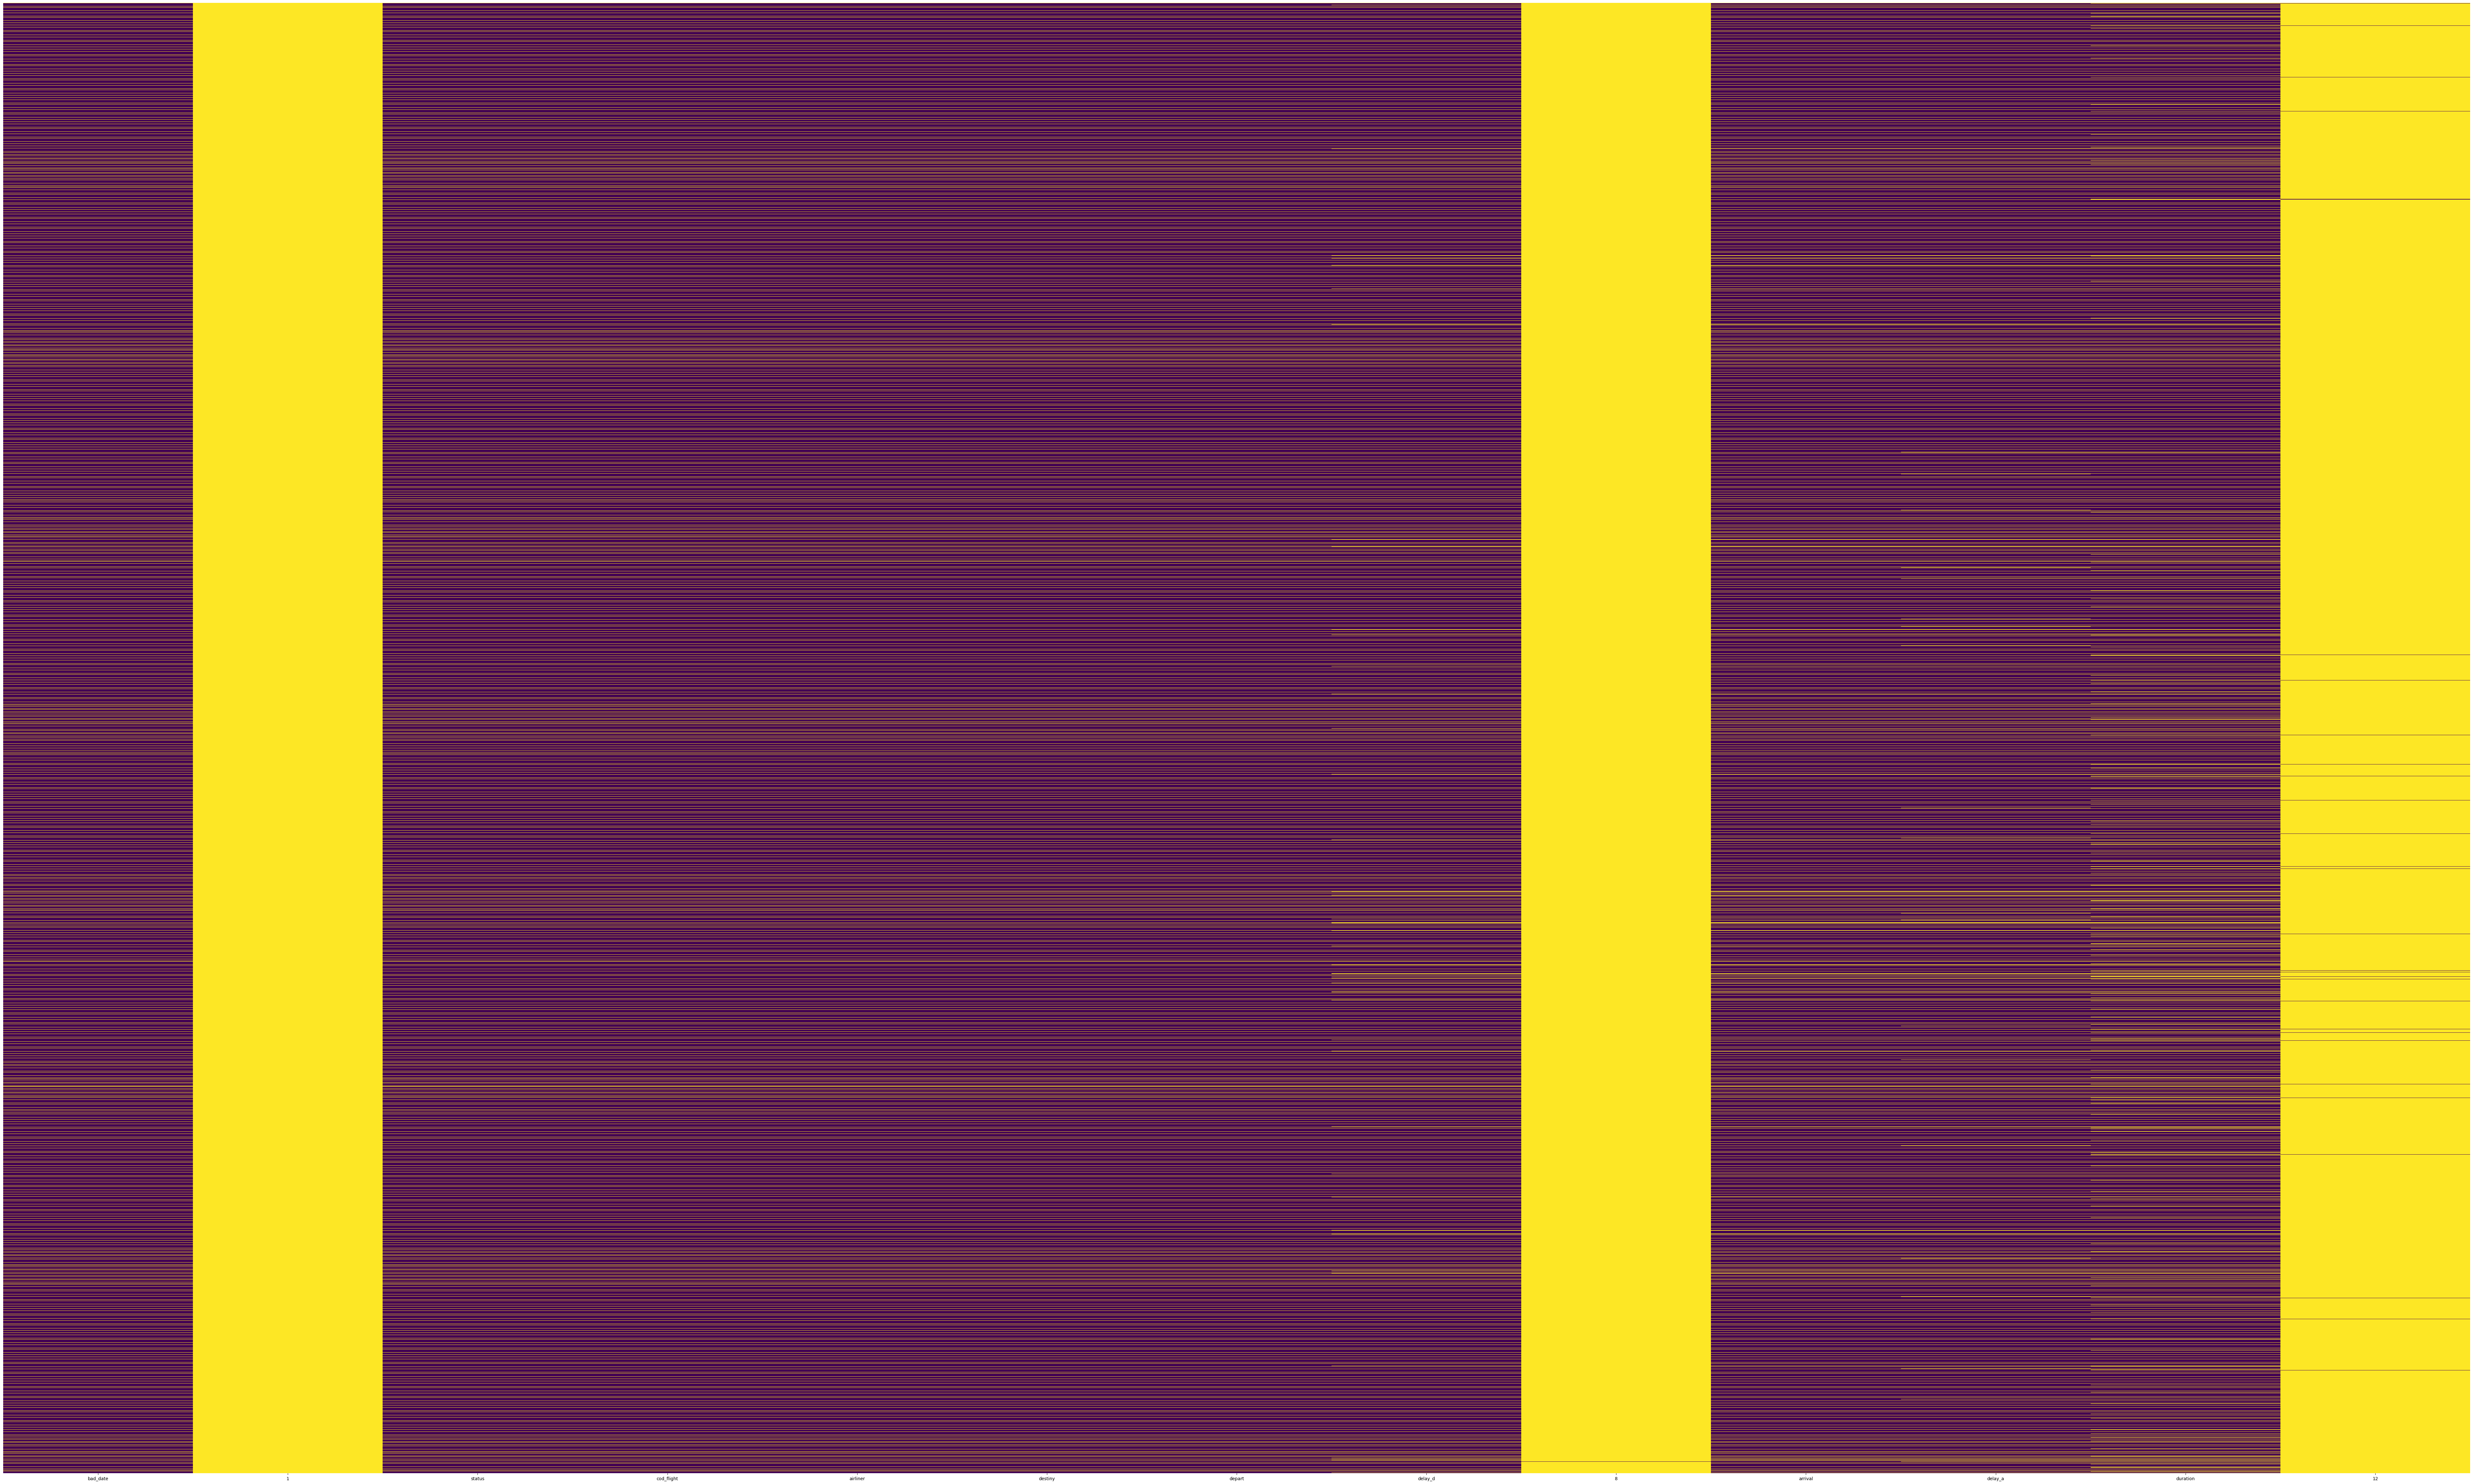

In [6]:
check_nan(fl)

## Se eliminan 3 columnas que tiene todos los valores nulos. Además se comprueba que se han ido generando periodicamente registros con todos los valores nulos en el proceso de extracción, por lo que se eliminan tambien todos estos registros.

In [7]:
fl = fl.drop(['12'], axis=1)
fl = fl.drop(['1'], axis=1)
fl = fl.drop(['8'], axis=1)

In [8]:
fl = fl.dropna(subset="airliner",axis = 0)

## Se vuelven a checkear los nulos, y se sustituyen los pocos que quedan (generalmente en registros de vuelos cancelados donde no hay datos de hora de salida e información de llegada) por "-".

'N nan cols: 4'

delay_d     1.153120
arrival     1.158348
delay_a     1.565546
duration    4.109102
dtype: float64

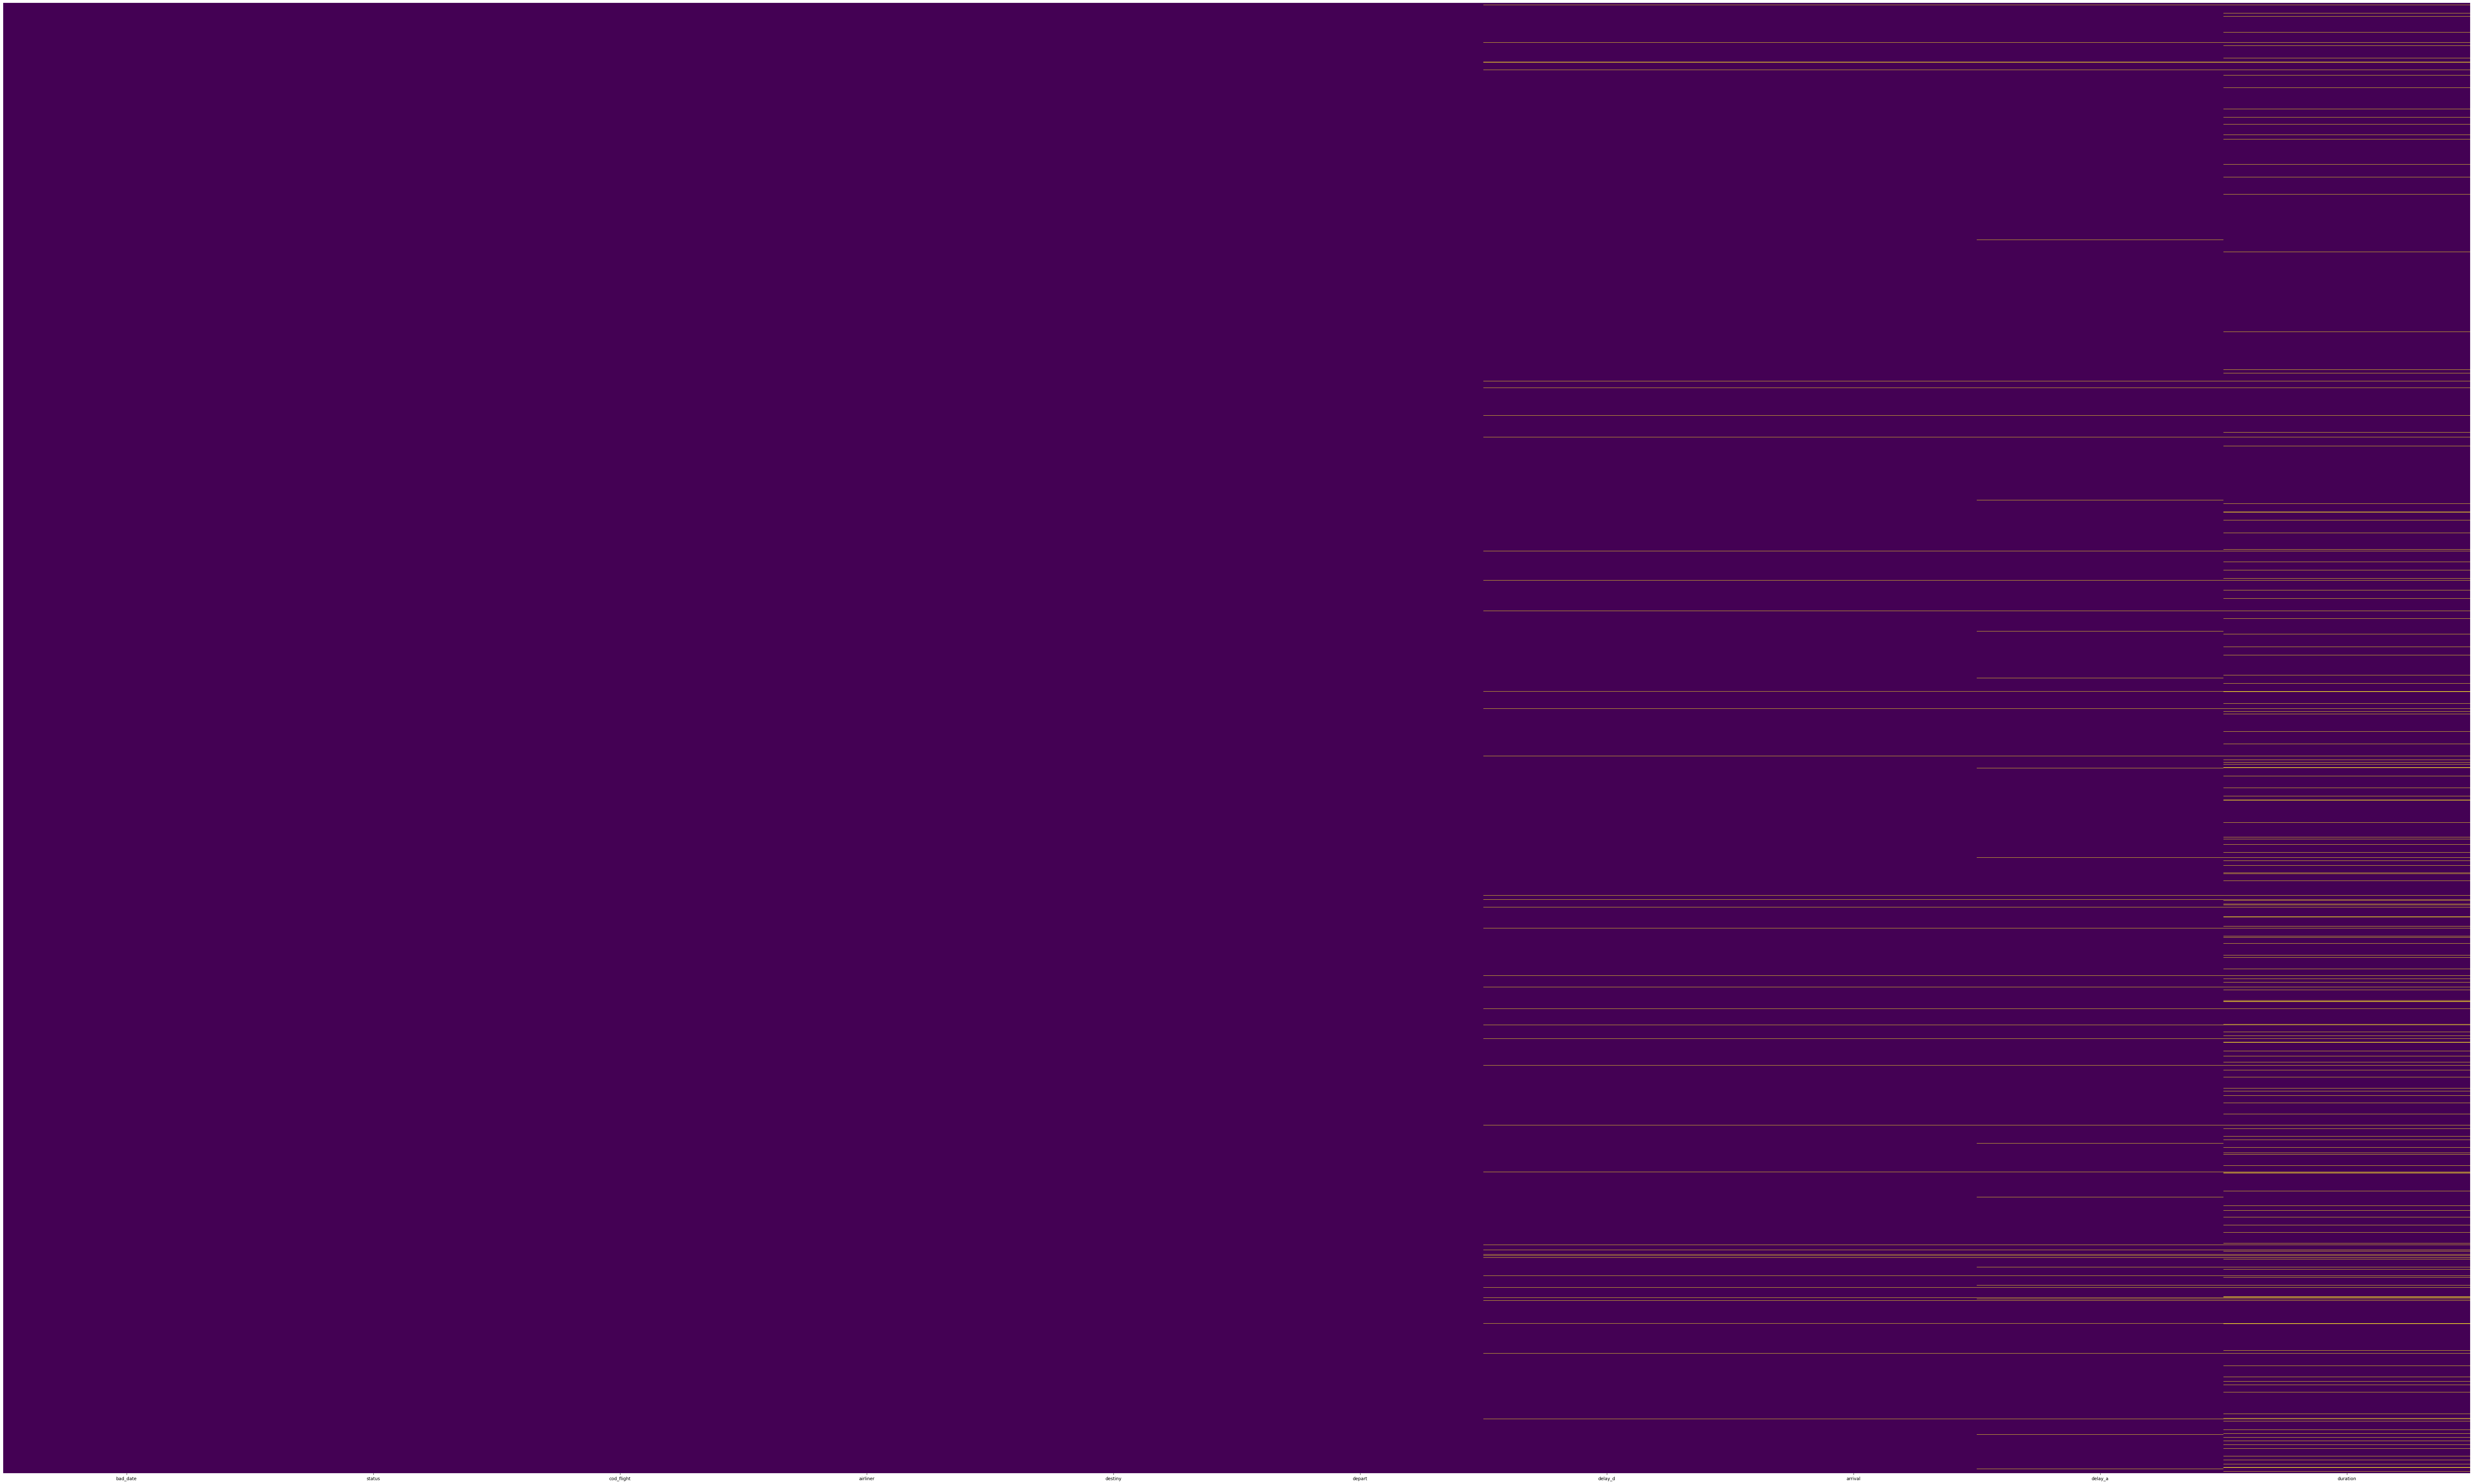

In [9]:
check_nan(fl)

In [10]:
fl.delay_d[fl.delay_d.isna()] = "-"
fl.arrival[fl.arrival.isna()] = "-"
fl.delay_a[fl.delay_a.isna()] = "-"
fl.duration[fl.duration.isna()] = "-"

In [11]:
fl.shape 

(191307, 10)

## Se eliminan los registros duplicados si los hubiere, y se eliminan aquellos registros de vuelos donde el estado sigue siendo *"Live"*.

In [12]:
fl = fl.drop_duplicates()

In [13]:
fl[fl["status"] == "Live"].shape

(448, 10)

In [14]:
fl = fl[fl['status'] != 'Live']

In [15]:
fl.bad_date.value_counts()

Fri, 08. Sep         536
Fri, 22. Sep         535
Mon, 11. Sep         535
Fri, 06. Oct         534
Thu, 07. Sep         534
                    ... 
Sat, 31. Dec 2022    385
Sun, 25. Dec 2022    377
Mon, 31. Oct 2022    228
Fri, 03. Nov         131
Sun, 01. Jan 2023      2
Name: bad_date, Length: 370, dtype: int64

## Se genera una nueva columna con el día de la semana del vuelo, extrayendolo de la columna llamada *"bad_date"*.

In [16]:
dias_semana = {
    'Mon': 'Monday',
    'Tue': 'Tuesday',
    'Wed': 'Wednesday',
    'Thu': 'Thursday',
    'Fri': 'Friday',
    'Sat': 'Saturday',
    'Sun': 'Sunday'
}

In [17]:
fl['week_day'] = fl['bad_date'].str[:3].map(dias_semana)

In [18]:
fl = fl.reset_index()

In [19]:
fl.head()

,index,bad_date,status,cod_flight,airliner,destiny,depart,delay_d,arrival,delay_a,duration,week_day
0,1,"Fri, 03. Nov",Landed,IB8726 ANE81NT,Iberia,IB/IBE Nice (NCE / LFMN) 10:00 CET,09:00 UTC 10:15 CET,15min late,11:40 CET,14min early,-,Friday
1,2,"Fri, 03. Nov",Landed,AF1001 AFR77FG,Air France,AF/AFR Paris (CDG / LFPG) 10:00 CET,09:00 UTC 10:24 CET,24min late,12:04 CET,5min early,1h 39m,Friday
2,6,"Fri, 03. Nov",Landed,U27640 EJU7640,easyJet,U2/EZY Lisbon (LIS / LPPT) 10:00 CET,09:00 UTC 10:03 CET,3min late,10:07 WET,17min early,1h 4m,Friday
3,7,"Fri, 03. Nov",Landed,IB3620 IBS3620,Iberia,IB/IBE Marrakesh (RAK / GMMX) 10:05 CET,09:05 UTC 10:16 CET,11min late,11:44 UTC+01,20min early,1h 27m,Friday
4,9,"Fri, 03. Nov",Landed,IB8746 ANE8746,Iberia,IB/IBE Marseille (MRS / LFML) 10:15 CET,09:15 UTC 10:30 CET,15min late,11:43 CET,16min early,1h 13m,Friday


In [20]:
fl = fl.drop(['index'], axis=1)

## Para poder limpiar la columna de la la fecha de manera más eficiente se va a dividir temporalmente el DataFrame en 2, uno para vuelos en 2022 y otro para 2023.

In [21]:
fl_23 = fl.loc[:149480]
fl_22 = fl.loc[149481:]

In [22]:
fl[fl["bad_date"]== 'Sun, 01. Jan']

,bad_date,status,cod_flight,airliner,destiny,depart,delay_d,arrival,delay_a,duration,week_day
149032,"Sun, 01. Jan",Landed,IB3118 IBE3118,Iberia,IB/IBE Lisbon (LIS / LPPT) 22:50 CET,21:50 UTC 23:04 CET,14min late,23:10 WET,on time,1h 5m,Sunday
149033,"Sun, 01. Jan",Landed,IB8880 ANE28KR,Iberia,IB/IBE Valencia (VLC / LEVC) 23:05 CET,22:05 UTC 23:18 CET,13min late,23:57 CET,12min early,39m,Sunday
149034,"Sun, 01. Jan",Landed,FR5791 RYR5791,Ryanair,FR/RYR Faro (FAO / LPFR) 23:20 CET,22:20 UTC 00:29 CET,1h 9min late,00:29 WET,49min late,1h,Sunday
149035,"Sun, 01. Jan",Unknown,TU606,Tunisair,TU/TAR Barcelona (BCN / LEBL) 23:25 CET,22:25 UTC 1h 15m,-,-,-,-,Sunday
149036,"Sun, 01. Jan",Landed,TU607 TAR607,Tunisair,TU/TAR Barcelona (BCN / LEBL) 23:25 CET,22:25 UTC 01:02 CET,1h 37min late,01:48 CET,22h 51min early,-,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
149505,"Sun, 01. Jan",Landed,LH1121 DLH21P,Lufthansa,LH/DLH Frankfurt (FRA / EDDF) 06:15 CET,05:15 UTC 06:24 CET,9min late,08:34 CET,21min early,2h 9m,Sunday
149506,"Sun, 01. Jan",Landed,UX1159 AEA78NK,Air Europa,UX/AEA Lisbon (LIS / LPPT) 06:30 CET,05:30 UTC 06:40 CET,10min late,06:39 WET,10min early,59m,Sunday
149507,"Sun, 01. Jan",Landed,UX1147 AEA55WY,Air Europa,UX/AEA Porto (OPO / LPPR) 06:35 CET,05:35 UTC 06:42 CET,7min late,06:38 WET,11min early,56m,Sunday
149508,"Sun, 01. Jan",Landed,AF1401 AFR75CD,Air France,AF/AFR Paris (CDG / LFPG) 06:40 CET,05:40 UTC 06:54 CET,14min late,08:33 CET,26min early,1h 38m,Sunday


In [23]:
fl_22.bad_date.value_counts()

Fri, 23. Dec 2022    515
Fri, 11. Nov 2022    504
Fri, 04. Nov 2022    503
Fri, 16. Dec 2022    502
Fri, 30. Dec 2022    500
                    ... 
Sat, 31. Dec 2022    385
Sun, 25. Dec 2022    377
Mon, 31. Oct 2022    228
Sun, 01. Jan           6
Sun, 01. Jan 2023      2
Name: bad_date, Length: 64, dtype: int64

## Se da la circunstancia que los vuelos de 2022 incluyen el año en la fecha pero no así los del 2023, por lo que se crea una función para que añada el año cuando sea necesario.

In [24]:
fl_22['bad_date'] = fl_22['bad_date'].apply(add_2023_if_needed)

In [25]:
fl_23['bad_date'] = fl_23['bad_date'].apply(add_2023_if_needed)

## Se utiliza una función propia (<span style="color:blue">convertir_fecha</span>) para transformar la columna "bad_date" a un formato Datetime reconocible por pandas.

In [26]:
fl_22['bad_date'] = fl_22['bad_date'].apply(convertir_fecha)


In [27]:
fl_23['bad_date'] = fl_23['bad_date'].apply(convertir_fecha)

In [28]:
fl_23.head()

,bad_date,status,cod_flight,airliner,destiny,depart,delay_d,arrival,delay_a,duration,week_day
0,2023-11-03,Landed,IB8726 ANE81NT,Iberia,IB/IBE Nice (NCE / LFMN) 10:00 CET,09:00 UTC 10:15 CET,15min late,11:40 CET,14min early,-,Friday
1,2023-11-03,Landed,AF1001 AFR77FG,Air France,AF/AFR Paris (CDG / LFPG) 10:00 CET,09:00 UTC 10:24 CET,24min late,12:04 CET,5min early,1h 39m,Friday
2,2023-11-03,Landed,U27640 EJU7640,easyJet,U2/EZY Lisbon (LIS / LPPT) 10:00 CET,09:00 UTC 10:03 CET,3min late,10:07 WET,17min early,1h 4m,Friday
3,2023-11-03,Landed,IB3620 IBS3620,Iberia,IB/IBE Marrakesh (RAK / GMMX) 10:05 CET,09:05 UTC 10:16 CET,11min late,11:44 UTC+01,20min early,1h 27m,Friday
4,2023-11-03,Landed,IB8746 ANE8746,Iberia,IB/IBE Marseille (MRS / LFML) 10:15 CET,09:15 UTC 10:30 CET,15min late,11:43 CET,16min early,1h 13m,Friday


## Se extraen los códigos IATA e ICAO del vuelo y se introducen en 2 nuevas columnas

In [29]:
fl_22[['cod_flight_IATA', 'cod_flight_ICAO']] = fl_22['cod_flight'].str.split(' ', expand=True)
fl_23[['cod_flight_IATA', 'cod_flight_ICAO']] = fl_23['cod_flight'].str.split(' ', expand=True)

In [30]:
fl_23.tail()

,bad_date,status,cod_flight,airliner,destiny,depart,delay_d,arrival,delay_a,duration,week_day,cod_flight_IATA,cod_flight_ICAO
149476,2023-01-01,Landed,IB8736 ANE90YB,Iberia,IB/IBE Toulouse (TLS / LFBO) 07:20 CET,06:20 UTC 07:26 CET,6min late,08:22 CET,17min early,55m,Sunday,IB8736,ANE90YB
149477,2023-01-01,Landed,UX1171 AEA1171,Air Europa,UX/AEA Brussels (BRU / EBBR) 07:20 CET,06:20 UTC 07:43 CET,23min late,09:24 CET,20min early,1h 41m,Sunday,UX1171,AEA1171
149478,2023-01-01,Landed,IB530 IBE05ZK,Iberia,IB/IBE Vigo (VGO / LEVX) 07:20 CET,06:20 UTC 07:27 CET,7min late,08:37 CET,2min early,1h 10m,Sunday,IB530,IBE05ZK
149479,2023-01-01,Landed,IB514 IBE05MC,Iberia,IB/IBE A Coruna (LCG / LECO) 07:20 CET,06:20 UTC 07:20 CET,on time,08:22 CET,17min early,1h 1m,Sunday,IB514,IBE05MC
149480,2023-01-01,Landed,IB3090 IBE30ZV,Iberia,IB/IBE Porto (OPO / LPPR) 07:20 CET,06:20 UTC 07:25 CET,5min late,07:28 WET,11min early,1h 2m,Sunday,IB3090,IBE30ZV


## Se vuelven a juntar los 2 DataFrames

In [31]:
fl = pd.concat([fl_23,fl_22])
fl.shape

(177990, 13)

## Se elimina la columna cod_flight una vez separados los 2 códigos

In [32]:
fl = fl.drop(['cod_flight'], axis=1)

## Se crea una funcion propia (<span style="color:blue">separar_valores</span>) que busca y separa en 2 columnas nuevas los códigos IATA e ICAO de la aerolínea que se encuentran en la columna "*destiny*"

In [33]:
separar_valores(fl, 'destiny')

In [34]:
pd.set_option('display.max_columns', None)

##  Se crea una funcion propia (<span style="color:blue">extraer_valores</span>) que busca y separa en 3 columnas nuevas los códigos IATA e ICAO y el nombre de la ciudad de destino que se encuentran en la columna "*destiny*".

In [35]:
extraer_valores(fl, 'destiny')

In [36]:
fl = fl.dropna(subset="cod_airliner_IATA",axis = 0)

##  Se crea una funcion propia (<span style="color:blue">extraer_hora</span>) para extraer la hora programada de salida del vuelo, que se espera encontrar en la columna "*depart*"

In [37]:
extraer_hora(fl, 'destiny')

##  Se crea una funcion propia (<span style="color:blue">extraer_segunda_hora</span>) para extraer la hora real de salida del vuelo, que se espera encontrar en la columna "*depart*"

In [38]:
extraer_segunda_hora(fl, 'depart')


In [39]:
fl.depart_time[fl.depart_time.isna()] = "-"

In [40]:
fl.head()

,bad_date,status,airliner,destiny,depart,delay_d,arrival,delay_a,duration,week_day,cod_flight_IATA,cod_flight_ICAO,cod_airliner_IATA,cod_airliner_ICAO,City,cod_airport_IATA,cod_airport_ICAO,Scheduled_dep,depart_time
0,2023-11-03,Landed,Iberia,IB/IBE Nice (NCE / LFMN) 10:00 CET,09:00 UTC 10:15 CET,15min late,11:40 CET,14min early,-,Friday,IB8726,ANE81NT,IB,IBE,Nice,NCE,LFMN,10:00,10:15
1,2023-11-03,Landed,Air France,AF/AFR Paris (CDG / LFPG) 10:00 CET,09:00 UTC 10:24 CET,24min late,12:04 CET,5min early,1h 39m,Friday,AF1001,AFR77FG,AF,AFR,Paris,CDG,LFPG,10:00,10:24
2,2023-11-03,Landed,easyJet,U2/EZY Lisbon (LIS / LPPT) 10:00 CET,09:00 UTC 10:03 CET,3min late,10:07 WET,17min early,1h 4m,Friday,U27640,EJU7640,U2,EZY,Lisbon,LIS,LPPT,10:00,10:03
3,2023-11-03,Landed,Iberia,IB/IBE Marrakesh (RAK / GMMX) 10:05 CET,09:05 UTC 10:16 CET,11min late,11:44 UTC+01,20min early,1h 27m,Friday,IB3620,IBS3620,IB,IBE,Marrakesh,RAK,GMMX,10:05,10:16
4,2023-11-03,Landed,Iberia,IB/IBE Marseille (MRS / LFML) 10:15 CET,09:15 UTC 10:30 CET,15min late,11:43 CET,16min early,1h 13m,Friday,IB8746,ANE8746,IB,IBE,Marseille,MRS,LFML,10:15,10:30


## Se eliminan las columnas "sucias" "*destiny*" y "*depart*" y se sustituyen los valores "scheduled" por "" en la columna "*duration*".

In [41]:
fl = fl.drop(['destiny'], axis=1)
fl = fl.drop(['depart'], axis=1)

In [42]:
fl['duration'] = fl['duration'].str.replace('scheduled', '')

In [43]:
fl.duration.value_counts()

-          7167
52m        2763
54m        2715
53m        2700
51m        2662
           ... 
18h 28m       1
17h 20m       1
 4h 5m        1
19h 10m       1
 5h 50m       1
Name: duration, Length: 1303, dtype: int64

##  Se crea una funcion propia (<span style="color:blue">redondear_horas</span>) para redondear la duracion del vuelo en horas, y poner "1h" en los vuelos de ">1h".

In [44]:
fl['duration'] = fl['duration'].apply(redondear_horas)

In [45]:
fl['duration'] = fl['duration'].str.replace(' ', '')

In [46]:
fl["duration"][fl["duration"]==""] = "-"

In [47]:
fl.delay_a.value_counts()

on time           7529
8min early        4941
9min early        4923
6min early        4910
7min early        4893
                  ... 
16h 19min late       1
4h 36min late        1
9h 15min late        1
17h 35min late       1
23h 17min late       1
Name: delay_a, Length: 1454, dtype: int64

## Se crea una nueva columna que combine la fecha y la hora prevista de salida de vuelo en formato datetime, para luego poder ordenar los vuelos cronológicamente.

In [48]:
fl['Departure_date_time'] = pd.to_datetime(fl['bad_date'] + ' ' + fl['Scheduled_dep'])

In [49]:
fl = fl.sort_values(by='Departure_date_time', ascending=False)

In [50]:
fl = fl.reset_index(drop = True)

##  Se crea una funcion propia (<span style="color:blue">asignar_estado_departure</span>) que busca el estado de la salida del vuelo que se espera encontrar en la columna "*delay_d*" y se crea una nueva columna.

In [51]:
fl['dep_situation'] = fl['delay_d'].apply(asignar_estado_departure)

In [52]:
fl.delay_d.value_counts()

18min late        6925
16min late        6879
17min late        6770
19min late        6706
15min late        6691
                  ... 
11h 6min late        1
23h 12min late       1
24h 40min late       1
3h 55min early       1
14h 46min late       1
Name: delay_d, Length: 1327, dtype: int64

In [53]:
fl.delay_d.value_counts()

18min late        6925
16min late        6879
17min late        6770
19min late        6706
15min late        6691
                  ... 
11h 6min late        1
23h 12min late       1
24h 40min late       1
3h 55min early       1
14h 46min late       1
Name: delay_d, Length: 1327, dtype: int64

##  Se crea una funcion propia (<span style="color:blue">calcular_minutos</span>) que suma los minutos de retraso o adelanto en la salida en función del estado del departure.

In [54]:
fl['dep_mins_of_delay'] = fl['delay_d'].apply(calcular_minutos)

In [55]:
fl.delay_a.value_counts()

on time           7529
8min early        4941
9min early        4923
6min early        4910
7min early        4893
                  ... 
18h 34min late       1
16h 19min late       1
9h 15min late        1
17h 35min late       1
23h 17min late       1
Name: delay_a, Length: 1454, dtype: int64

## Se aplica tambien la función  (<span style="color:blue">calcular_minutos</span>) para las llegadas.

In [56]:
fl['arr_mins_of_delay'] = fl['delay_a'].apply(calcular_minutos)


In [57]:
fl[["delay_d","dep_mins_of_delay","delay_a","arr_mins_of_delay"]].head(10)

,delay_d,dep_mins_of_delay,delay_a,arr_mins_of_delay
0,32min late,32,19min late,19
1,5min late,5,15min late,15
2,29min late,29,31min late,31
3,44min late,44,41min late,41
4,26min late,26,11min late,11
5,24min late,24,4min late,4
6,7min late,7,12min early,-12
7,16min late,16,1min early,-1
8,19min late,19,1min late,1
9,15min late,15,16min early,-16


##  Se crea una funcion propia (<span style="color:blue">calcular_diferencia</span>) que calcula la diferencia entre los minutos de retraso/adelanto en la salida y la llegada para ver anomalías en los registros.

In [58]:
fl["resta"] = fl.apply(calcular_diferencia, axis=1)

In [59]:
fl[["delay_d","dep_mins_of_delay","delay_a","arr_mins_of_delay","resta"]].head()

,delay_d,dep_mins_of_delay,delay_a,arr_mins_of_delay,resta
0,32min late,32,19min late,19,13
1,5min late,5,15min late,15,-10
2,29min late,29,31min late,31,-2
3,44min late,44,41min late,41,3
4,26min late,26,11min late,11,15


In [60]:
len(fl[abs(fl.resta) > 100])

2836

## Se aplica tambien la función  (<span style="color:blue">asignar_estado_departure</span>) para las llegadas.

In [61]:
fl['arr_situation'] = fl['delay_a'].apply(asignar_estado_departure)

## Se añade un *id* a cada uno de los vuelos

In [62]:
fl['flight_id'] = range(1, len(fl) + 1)

## Se eliminan columnas sucias y se reordenan las restantes cambiando alguno de sus nombres.

In [63]:
fl = fl.drop(['delay_d'], axis=1)
fl = fl.drop(['delay_a'], axis=1)

In [64]:
reorder = ["flight_id","Departure_date_time","cod_flight_IATA","cod_flight_ICAO","bad_date","week_day","status","airliner","cod_airliner_IATA","cod_airliner_ICAO",
           "Scheduled_dep","depart_time","dep_situation","dep_mins_of_delay","City","cod_airport_IATA","cod_airport_ICAO","arrival",
           "arr_situation","arr_mins_of_delay","duration","resta"]
fl = fl[reorder]

In [65]:
fl.head()

,flight_id,Departure_date_time,cod_flight_IATA,cod_flight_ICAO,bad_date,week_day,status,airliner,cod_airliner_IATA,cod_airliner_ICAO,Scheduled_dep,depart_time,dep_situation,dep_mins_of_delay,City,cod_airport_IATA,cod_airport_ICAO,arrival,arr_situation,arr_mins_of_delay,duration,resta
0,1,2023-11-03 10:50:00,TU607,TAR607,2023-11-03,Friday,Landed,Tunisair,TU,TAR,10:50,11:22,late,32,Barcelona,BCN,LEBL,12:19 CET,late,19,-,13
1,2,2023-11-03 10:45:00,UX7157,AEA81CR,2023-11-03,Friday,Landed,Air Europa,UX,AEA,10:45,10:50,late,5,Bilbao,BIO,LEBB,12:00 CET,late,15,1h,-10
2,3,2023-11-03 10:40:00,UX7302,AEA7302,2023-11-03,Friday,Landed,Air Europa,UX,AEA,10:40,11:09,late,29,Vigo,VGO,LEVX,12:16 CET,late,31,-,-2
3,4,2023-11-03 10:35:00,UX7231,AEA76PN,2023-11-03,Friday,Landed,Air Europa,UX,AEA,10:35,11:19,late,44,A Coruna,LCG,LECO,12:26 CET,late,41,1h,3
4,5,2023-11-03 10:35:00,UX5043,AEA5043,2023-11-03,Friday,Landed,Air Europa,UX,AEA,10:35,11:01,late,26,Malaga,AGP,LEMG,11:56 CET,late,11,1h,15


In [66]:
fl = fl.rename(columns ={'City':'city', 'Departure_date_time':'departure_date_time', "bad_date": "day"})

## Nos quedamos exclusivamente con los vuelos del rango de fechas deseados.

In [67]:
fl = fl[(fl["departure_date_time"] < "2023-11-01") & (fl["departure_date_time"] >= "2022-11-01")]

## Se reindexa y se exportan los datos limpios en formato *csv*.

In [68]:
fl['flight_id'] = range(1, len(fl) + 1)
fl = fl.reset_index(drop = True)
fl.head()

,flight_id,departure_date_time,cod_flight_IATA,cod_flight_ICAO,day,week_day,status,airliner,cod_airliner_IATA,cod_airliner_ICAO,Scheduled_dep,depart_time,dep_situation,dep_mins_of_delay,city,cod_airport_IATA,cod_airport_ICAO,arrival,arr_situation,arr_mins_of_delay,duration,resta
0,1,2023-10-31 23:59:00,IB6841,IBE6841,2023-10-31,Tuesday,Landed,Iberia,IB,IBE,23:59,00:32,late,33,Buenos Aires,EZE,SAEZ,08:29 UTC-03,on time,0,12h,33
1,2,2023-10-31 23:59:00,IB6011,IBE6011,2023-10-31,Tuesday,Landed,Iberia,IB,IBE,23:59,00:24,late,25,Montevideo,MVD,SUMU,08:48 UTC-03,early,-6,12h,31
2,3,2023-10-31 23:59:00,IB6833,IBE6833,2023-10-31,Tuesday,Landed,Iberia,IB,IBE,23:59,00:34,late,35,Santiago,SCL,SCEL,09:13 UTC-03,early,-6,13h,41
3,4,2023-10-31 23:55:00,IB6827,IBE6827,2023-10-31,Tuesday,Landed,Iberia,IB,IBE,23:55,00:27,late,32,Sao Paulo,GRU,SBGR,06:49 UTC-03,early,-15,10h,47
4,5,2023-10-31 23:55:00,IB6589,IBE6589,2023-10-31,Tuesday,Landed,Iberia,IB,IBE,23:55,00:19,late,24,Bogota,BOG,SKBO,03:52 UTC-05,early,-27,10h,51


In [69]:
fl.shape

(176596, 22)

In [70]:
fl.tail()

,flight_id,departure_date_time,cod_flight_IATA,cod_flight_ICAO,day,week_day,status,airliner,cod_airliner_IATA,cod_airliner_ICAO,Scheduled_dep,depart_time,dep_situation,dep_mins_of_delay,city,cod_airport_IATA,cod_airport_ICAO,arrival,arr_situation,arr_mins_of_delay,duration,resta
176591,176592,2022-11-01 06:10:00,FR5997,RYR93XH,2022-11-01,Tuesday,Landed,Ryanair,FR,RYR,06:10,06:32,late,22,London,STN,EGSS,07:31 GMT,early,-8,2h,30
176592,176593,2022-11-01 06:10:00,FR2084,RYR69HY,2022-11-01,Tuesday,Landed,Ryanair,FR,RYR,06:10,06:34,late,24,Ibiza,IBZ,LEIB,07:38 CET,late,8,1h,16
176593,176594,2022-11-01 06:00:00,KL1698,KLM22A,2022-11-01,Tuesday,Landed,KLM Royal Dutch Airlines,KL,KLM,06:00,06:08,late,8,Amsterdam,AMS,EHAM,08:11 CET,early,-28,2h,36
176594,176595,2022-11-01 01:45:00,UX39,AEA039,2022-11-01,Tuesday,Landed,Air Europa,UX,AEA,01:45,02:02,late,17,Quito,UIO,SEQM,06:36 UTC-05,late,11,11h,6
176595,176596,2022-11-01 00:25:00,AV47,AVA047,2022-11-01,Tuesday,Landed,Avianca,AV,AVA,00:25,00:38,late,13,Bogota,BOG,SKBO,04:14 UTC-05,early,-35,-,48


In [71]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176596 entries, 0 to 176595
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   flight_id            176596 non-null  int64         
 1   departure_date_time  176596 non-null  datetime64[ns]
 2   cod_flight_IATA      176596 non-null  object        
 3   cod_flight_ICAO      173331 non-null  object        
 4   day                  176596 non-null  object        
 5   week_day             176596 non-null  object        
 6   status               176596 non-null  object        
 7   airliner             176596 non-null  object        
 8   cod_airliner_IATA    176596 non-null  object        
 9   cod_airliner_ICAO    176596 non-null  object        
 10  Scheduled_dep        176596 non-null  object        
 11  depart_time          176596 non-null  object        
 12  dep_situation        176596 non-null  object        
 13  dep_mins_of_de

In [79]:
fl.cod_airport_ICAO.unique()

array(['SAEZ', 'SUMU', 'SCEL', 'SBGR', 'SKBO', 'MMMX', 'SPJC', 'SGAS',
       'LEPA', 'LPPT', 'LEBL', 'LEVC', 'ZSPD', 'LEVX', 'LECO', 'GCLP',
       'GCTS', 'LEBB', 'LEAS', 'LFMN', 'LFML', 'LFPG', 'GCRR', 'LIRF',
       'RKSI', 'SLCB', 'EGSS', 'LIPZ', 'LELO', 'GMME', 'EGLL', 'LIML',
       'LPPR', 'EGGD', 'ELLX', 'EHAM', 'LEPP', 'GCFV', 'GCXO', 'LSGG',
       'LFPO', 'GMTT', 'EBCI', 'LHBP', 'LEMH', 'LFLL', 'EDDM', 'EBBR',
       'LIRN', 'EDDB', 'LSZH', 'LOWW', 'LEIB', 'EDDF', 'EDDL', 'LEZL',
       'LEAM', 'LEST', 'LEXJ', 'EDDH', 'LEJR', 'LEGR', 'LEAL', 'LFBO',
       'CYYZ', 'LESO', 'LROP', 'LEMG', 'GMMN', 'EPWA', 'GOBD', 'FNLU',
       'LEBZ', 'LTFM', 'EGKK', 'EBLG', 'LBSF', 'LIRQ', 'EGPH', 'LIMF',
       'KJFK', 'ENGM', 'GEML', 'LIMC', 'MDSD', 'KMIA', 'MDPC', 'LFBD',
       'TJSJ', 'GMMX', 'LFRS', 'LIPE', 'EKCH', 'SVMI', 'LPMA', 'MUHA',
       'OTHH', 'SKRG', 'LFST', 'OEJN', 'SKCL', 'MPTO', 'OJAI', 'MROC',
       'MUCU', 'HECA', 'LTFJ', 'OMDB', 'MMGL', 'LICJ', 'LMML', 'KBOS',
      

In [73]:
fl.to_csv("../data/flights/flights.csv", index=False)